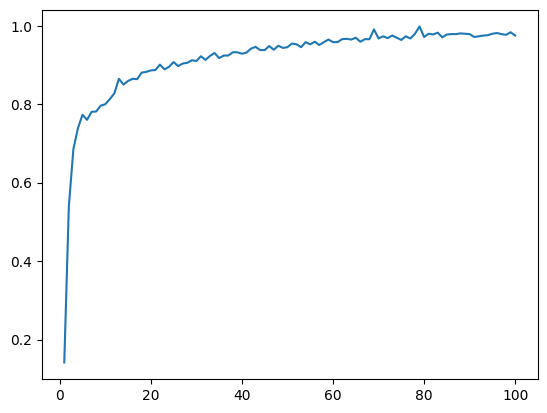

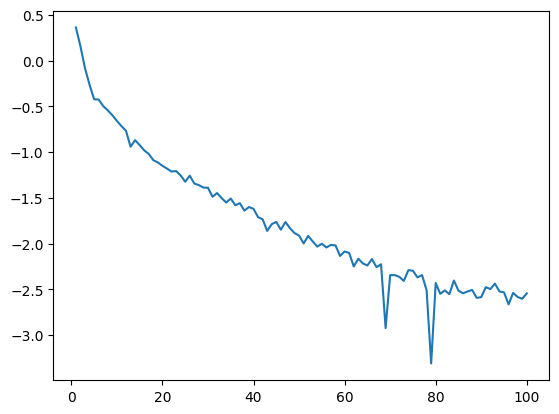

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

path = "/root/app/"
csv_name = "competition_hist_0421_192139.csv" 
df = pd.read_csv(path + csv_name)

x = df["Epoch"]

y = df["Acc"]
plt.plot(x, y)
plt.show()

y = df["Loss"]
plt.plot(x, np.log(y))
plt.show()